# Podcast Reviews Data Analysis Part 1: Data Exploration

Dataset link: https://www.kaggle.com/datasets/thoughtvector/podcastreviews/versions/28

**Note**: Part 2 of this analysis is in Jupyter notebook called podcasts_analysis.ipynb

# 0. Importing data and libraries

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.gridspec import GridSpec
from ydata_profiling import ProfileReport

import helper_functions as hf

import sqlite3 as sql

sns.set_style("darkgrid")

<IPython.core.display.Javascript object>

# 1. Exploring the dataset

In [3]:
# connect to the database
conn = sql.connect("database.sqlite")

# create a cursor
c = conn.cursor()

<IPython.core.display.Javascript object>

In [4]:
# get tables dataframe
tables = pd.read_sql(
    """
                    SELECT *
                    FROM sqlite_master
                    WHERE type = 'table';
                    """,
    conn,
)
tables

,type,name,tbl_name,rootpage,sql
0,table,runs,runs,2,CREATE TABLE runs (\n run_at text not n...
1,table,podcasts,podcasts,3,CREATE TABLE podcasts (\n podcast_id te...
2,table,categories,categories,5,CREATE TABLE categories (\n podcast_id ...
3,table,reviews,reviews,7,CREATE TABLE reviews (\n podcast_id tex...


<IPython.core.display.Javascript object>

In [5]:
# getting the column details
table_details = pd.read_sql(
    """
            SELECT sql
            FROM sqlite_master
            WHERE type = 'table';
            """,
    conn,
).values.tolist()

for t in table_details:
    print(t)
    print("-" * 20)

['CREATE TABLE runs (\n        run_at text not null,\n        max_rowid integer not null,\n        reviews_added integer not null\n    )']
--------------------
['CREATE TABLE podcasts (\n        podcast_id text primary key,\n        itunes_id integer not null,\n        slug text not null,\n        itunes_url text not null,\n        title text not null\n    )']
--------------------
['CREATE TABLE categories (\n        podcast_id text not null,\n        category text not null\n    )']
--------------------
['CREATE TABLE reviews (\n        podcast_id text not null,\n        title text not null,\n        content text not null,\n        rating integer not null,\n        author_id text not null,\n        created_at text not null\n    )']
--------------------


<IPython.core.display.Javascript object>

## Podcasts table

In [6]:
podcasts = pd.read_sql(
    """
            SELECT *
            FROM podcasts;
            """,
    conn,
)

podcasts

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift
...,...,...,...,...,...
110019,ffff32caeedd6254573ad1cc49852595,284285309,antonia-gonzales,https://podcasts.apple.com/us/podcast/antonia-...,Antonia Gonzales
110020,ffff5db4b5db2d860c49749e5de8a36d,384521934,frankenstein-or-the-modern-prometheus,https://podcasts.apple.com/us/podcast/frankens...,"Frankenstein, or the Modern Prometheus"
110021,ffff66f98c1adfc8d0d6c41bb8facfd0,1435731839,whos-bringing-wine,https://podcasts.apple.com/us/podcast/whos-bri...,Who’s Bringing Wine?
110022,ffff923482740bc21a0fe184865ec2e2,1271277212,tefl-waffle,https://podcasts.apple.com/us/podcast/tefl-waf...,TEFL Waffle


<IPython.core.display.Javascript object>

In [7]:
podcasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110024 entries, 0 to 110023
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   podcast_id  110024 non-null  object
 1   itunes_id   110024 non-null  int64 
 2   slug        110024 non-null  object
 3   itunes_url  110024 non-null  object
 4   title       110024 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


<IPython.core.display.Javascript object>

In [8]:
# get unique values
pd.read_sql(
    """
            SELECT
            COUNT(DISTINCT(podcast_id)) AS unique_podcast_id,
            COUNT(DISTINCT(itunes_id)) AS unique_itunes_id,
            COUNT(DISTINCT(title)) AS unique_titles
            FROM podcasts;
    """,
    conn,
)

,unique_podcast_id,unique_itunes_id,unique_titles
0,110024,110024,109274


<IPython.core.display.Javascript object>

We can observe that there are duplicate titles in this table.

In [74]:
# get unique values
pd.read_sql(
    """
            SELECT
            title,
            COUNT(*) AS title_count
            FROM podcasts
            GROUP BY title
            HAVING title_count > 1
            ORDER BY title_count DESC;
    """,
    conn,
)

,title,title_count
0,No Title,8
1,What's Next?,4
2,Welcome Home,4
3,Unfiltered,4
4,Speak Your Mind,4
...,...,...
670,Acme Packing Company: for Green Bay Packers fans,2
671,Absolutely Not,2
672,Abide,2
673,ASMR SOUNDS,2


<IPython.core.display.Javascript object>

- There are 675 titles that are used at least twice in our dataset (for different unique podcast IDs). It is very unlikely that these are different episodes of the same podcast. These duplicate titles may be due to errors during scraping, or due to availability of different podcasts with the same title. Note that the most duplicated podcast title is "No Title", so it may be considered a missing value (or there are 8 podcasts that have decided to have no title). 

In [78]:
pd.read_sql(
    """
            SELECT
            itunes_url
            FROM podcasts
            WHERE title LIKE 'No Title';
    """,
    conn,
).values.tolist()

[['https://podcasts.apple.com/us/podcast/no-title/id676308398'],
 ['https://podcasts.apple.com/us/podcast/no-title/id293167912'],
 ['https://podcasts.apple.com/us/podcast/no-title/id590237225'],
 ['https://podcasts.apple.com/us/podcast/no-title/id586627672'],
 ['https://podcasts.apple.com/us/podcast/no-title/id260754016'],
 ['https://podcasts.apple.com/us/podcast/no-title/id1444235344'],
 ['https://podcasts.apple.com/us/podcast/no-title/id526426688'],
 ['https://podcasts.apple.com/us/podcast/no-title/id905057808']]

<IPython.core.display.Javascript object>

All of the podcasts with "No Title" have different url.

## Runs table

In [10]:
runs = pd.read_sql(
    """
            SELECT *
            FROM runs;
            """,
    conn,
)

runs.sort_values(by=["run_at"])

,run_at,max_rowid,reviews_added
0,2021-05-10 02:53:00,3266481,1215223
1,2021-06-06 21:34:36,3300773,13139
2,2021-07-02 18:04:55,3329699,11561
3,2021-08-01 17:54:42,3360315,11855
4,2021-09-02 18:00:30,3390165,11714
5,2021-10-11 05:18:23,3428923,16845
6,2022-04-20 01:03:30,3855531,36589
7,2022-06-05 16:15:16,3855531,0
8,2022-06-22 19:44:32,4479220,29146
9,2022-07-03 19:50:22,5149673,559523


<IPython.core.display.Javascript object>

- It seems like there were 16 updates overall during which new reviews were added. The new reviews were added monthly with several longer pauses in between updates. 
- There was one update when 0 new reviews were added (on 2022-06-05 with previous update on 2022-04-20)

## Categories table

- There are 110 unique categories;
- The most popular categories are: society-culture, education, comedy, religion-spirituality, and business.

In [11]:
categories = pd.read_sql(
    """
            SELECT *
            FROM categories;
            """,
    conn,
)

categories

,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design
...,...,...
212367,da8331a8fbbba6fe1e2653f2fa86e168,news
212368,da8331a8fbbba6fe1e2653f2fa86e168,news-news-commentary
212369,da8331a8fbbba6fe1e2653f2fa86e168,science
212370,d41b3b7b2413fcf202d8bef1512554dc,islam


<IPython.core.display.Javascript object>

In [12]:
# get count of unique values
pd.read_sql(
    """
            SELECT
            COUNT(DISTINCT(category)) AS num_unique_categories
            FROM categories;
    """,
    conn,
)

,num_unique_categories
0,110


<IPython.core.display.Javascript object>

In [20]:
# get unique values
pd.read_sql(
    """
            SELECT
            DISTINCT(category) 
            FROM categories;
    """,
    conn,
).values.tolist()

[['arts'],
 ['arts-performing-arts'],
 ['music'],
 ['arts-design'],
 ['education'],
 ['society-culture'],
 ['arts-visual-arts'],
 ['leisure'],
 ['leisure-hobbies'],
 ['arts-books'],
 ['technology'],
 ['society-culture-personal-journals'],
 ['society-culture-relationships'],
 ['fiction'],
 ['fiction-science-fiction'],
 ['arts-food'],
 ['education-language-learning'],
 ['fiction-drama'],
 ['true-crime'],
 ['health-fitness'],
 ['health-fitness-nutrition'],
 ['history'],
 ['comedy'],
 ['arts-fashion-beauty'],
 ['tv-film'],
 ['society-culture-places-travel'],
 ['comedy-comedy-interviews'],
 ['kids-family'],
 ['health-fitness-mental-health'],
 ['religion-spirituality'],
 ['business'],
 ['news'],
 ['news-business-news'],
 ['education-courses'],
 ['society-culture-philosophy'],
 ['leisure-video-games'],
 ['tv-film-film-reviews'],
 ['leisure-games'],
 ['spirituality'],
 ['tv-film-film-history'],
 ['business-careers'],
 ['business-entrepreneurship'],
 ['science'],
 ['science-earth-sciences'],
 [

<IPython.core.display.Javascript object>

In [21]:
# get top-10 categories by count of podcasts
pd.read_sql(
    """
            SELECT category, COUNT(*) AS category_count 
            FROM categories
            GROUP BY category
            ORDER BY category_count DESC
            LIMIT 10;
            """,
    conn,
)

,category,category_count
0,society-culture,18710
1,education,12628
2,comedy,12464
3,religion-spirituality,12190
4,business,12058
5,arts,8953
6,sports,8388
7,health-fitness,8123
8,christianity,7954
9,tv-film,7714


<IPython.core.display.Javascript object>

In [22]:
# get bottom-10 categories by count of podcasts
pd.read_sql(
    """
            SELECT category, COUNT(*) AS category_count 
            FROM categories
            GROUP BY category
            ORDER BY category_count
            LIMIT 10;
            """,
    conn,
)

,category,category_count
0,sports-volleyball,14
1,science-mathematics,16
2,science-chemistry,17
3,science-physics,18
4,sports-swimming,18
5,sports-cricket,21
6,sports-rugby,35
7,hinduism,36
8,sports-tennis,38
9,science-astronomy,55


<IPython.core.display.Javascript object>

## Reviews table

In [18]:
reviews = pd.read_sql(
    """
            SELECT *
            FROM reviews;
            """,
    conn,
)

reviews

,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00
...,...,...,...,...,...,...
2067524,ca0ed0b0822c8f76fe7f41a4027c3907,All the good stuff!,"I just stumbled onto this actual play, and hav...",5,C79E747DAA69C6E,2022-11-06T11:25:14-07:00
2067525,fe5dc7e58a8bb72a4b2cc4ec43378313,Engaging thru and thru,Each episode is entirely engaging with some of...,5,B4C64915C026463,2022-12-14T14:33:47-07:00
2067526,ec0898451fd6b961c42beceaeec43648,I will be binging!,Just found this podcast and I already plan to ...,5,EE7877B6C336602,2023-02-16T08:15:52-07:00
2067527,ebc36287c28e63f458d55fd2a25e6658,"Great story, bad music",This podcast is great and I highly recommend i...,5,F9AF6C4B6E68787,2022-10-25T14:52:02-07:00


<IPython.core.display.Javascript object>

In [54]:
# get unique values
pd.read_sql(
    """
            SELECT
            COUNT(*) AS rows_count,
            COUNT(DISTINCT(podcast_id)) AS unique_podcast_id,
            COUNT(DISTINCT(title)) AS unique_titles,
            COUNT(DISTINCT(content)) AS unique_reviews,
            COUNT(DISTINCT(author_id)) AS unique_authors
            FROM reviews;
    """,
    conn,
)

,rows_count,unique_podcast_id,unique_titles,unique_reviews,unique_authors
0,2067529,111544,1138688,2049707,1475285


<IPython.core.display.Javascript object>

In [68]:
pd.read_sql(
    """
            SELECT
            p.title,
            r.content AS reviews,
            r.author_id,
            COUNT(*) AS duplicate_reviews_num
            FROM reviews r
            JOIN podcasts p
            USING(podcast_id)
            GROUP BY p.title, reviews, r.author_id
            HAVING duplicate_reviews_num > 1
            ORDER BY duplicate_reviews_num DESC, p.title;
    """,
    conn,
)

,title,reviews,author_id,duplicate_reviews_num
0,Raider Power Podcast,Hi Ryan and Chris.\nReally love your podcast l...,638AB2A1FAD6645,40
1,Mary English Astrologer Blog,Learn astrology with Mary helped me transition...,BAC4454D7D50CEB,24
2,Mitchum | Tales of a Moonshine Bootlegger in G...,The Story and Mitchum's account is so interest...,D02C95E0FC00426,24
3,iNTO THE FRAY RADIO - An Encounter with the Ab...,I've been listening to ITF for about a year no...,D5B2B52C3CD80F8,19
4,iNTO THE FRAY RADIO - An Encounter with the Ab...,I've been listening to ITF for about a year no...,D5B2B52C3CD80F8,19
...,...,...,...,...
2583,iNTO THE FRAY RADIO - An Encounter with the Ab...,If you enjoy true stories of the strange witho...,7ADE14A1573481F,2
2584,lemonparty,I wish Tim all the best.,D6EF6C298A548E8,2
2585,music,You changed it from ads ❤️‍🔥❤️‍🔥❤️‍🔥keep it up...,DB76FD10D6C4209,2
2586,rSlash,I listen to it often and it is absolutely hila...,048EEF81C2514DA,2


<IPython.core.display.Javascript object>

There are some duplicate reviews from the same authors on the same podcasts. It may be due to scraping mistakes, or due to reviews being copy-pasted multiple times. It makes sense to get rid of the duplicate reviews in our further analysis.

In [69]:
reviews_yearly = pd.read_sql(
    """
            SELECT
            strftime('%Y', created_at) AS year,
            COUNT(*) AS count
            FROM
            reviews
            GROUP BY year
            ORDER BY year;
            """,
    conn,
)

reviews_yearly

,year,count
0,None,2
1,2005,208
2,2006,3375
3,2007,5918
4,2008,8502
5,2009,11166
6,2010,12898
7,2011,17835
8,2012,26404
9,2013,25592


<IPython.core.display.Javascript object>

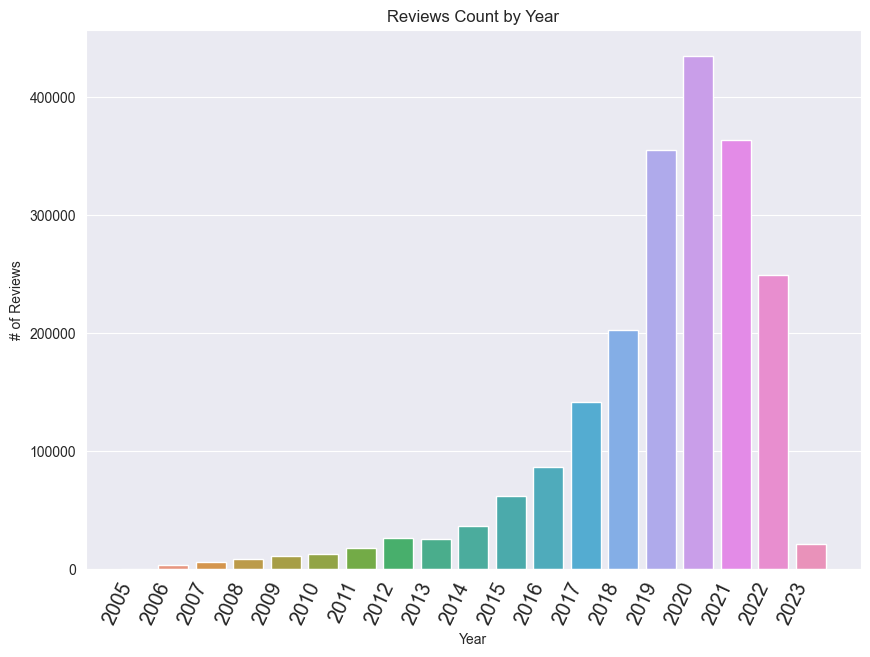

<IPython.core.display.Javascript object>

In [36]:
df = reviews_yearly.dropna(subset=["year", "count"]).sort_values("year")

hf.plot_sns_barplot(
    df,
    x="year",
    y="count",
    x_label="Year",
    y_label="# of Reviews",
    title="Reviews Count by Year",
)

There majority of reviews were created in the period from 2019 to 2021.

In [41]:
# get unique values
pd.read_sql(
    """
            SELECT
            DISTINCT(rating) 
            FROM reviews;
    """,
    conn,
).sort_values(by="rating").values.tolist()

[[1], [2], [3], [4], [5]]

<IPython.core.display.Javascript object>

In [49]:
rating_count = pd.read_sql(
    """
            SELECT
            DISTINCT(rating) AS rating,
            COUNT(*) AS num_reviews
            FROM reviews
            GROUP BY rating
            ORDER BY rating;
    """,
    conn,
)

rating_count

,rating,num_reviews
0,1,116547
1,2,45866
2,3,52176
3,4,62883
4,5,1790057


<IPython.core.display.Javascript object>

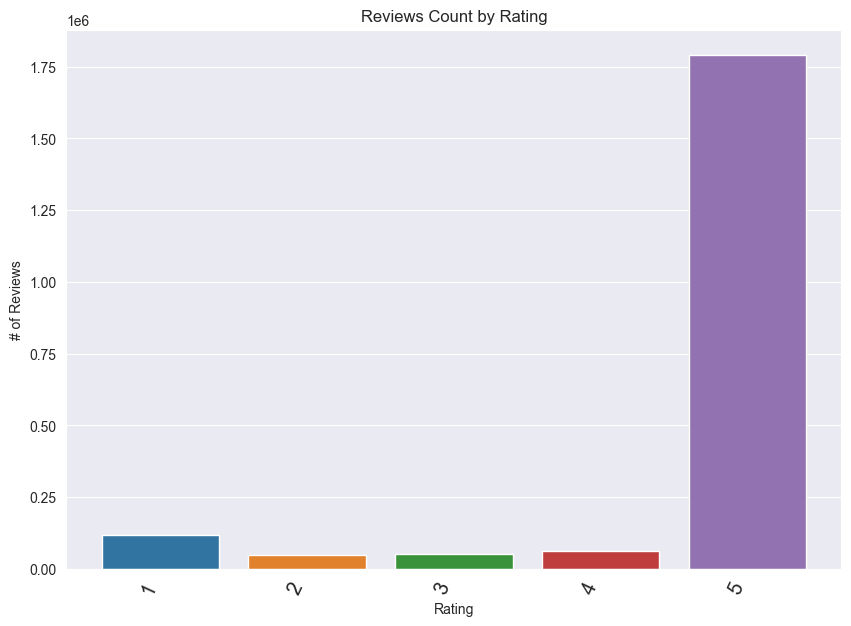

<IPython.core.display.Javascript object>

In [50]:
hf.plot_sns_barplot(
    rating_count,
    x="rating",
    y="num_reviews",
    x_label="Rating",
    y_label="# of Reviews",
    title="Reviews Count by Rating",
)

Most of the reviews are highly rated with the rating 5. But on the second place by the number of reviews, there is the rating 1 (the lowest one). It may be due to that people tend to write reviews when they feel strongly about the podcast (both posively or negatively).